
Quantum State (Total execution time: 1000)
|100〉: 100.00%


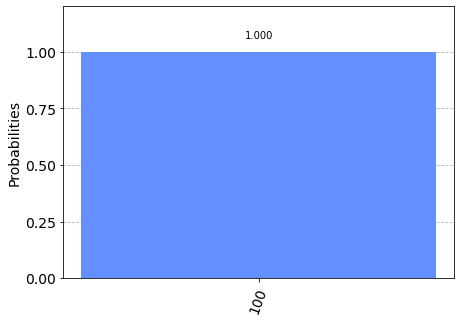

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

def showQState(statistic) :
    all_state = sorted(statistic.keys())
    total_count = sum(statistic.values())
    print("\nQuantum State (Total execution time: {})".format(total_count))
    for i in all_state :
        print("|{}〉: {:.2f}%".format(i, statistic[i]/total_count*100))

# create a quantum circuit
qRegisterX = QuantumRegister(3, 'x')
qRegisterY = QuantumRegister(1, 'y')
cRegister = ClassicalRegister(3, 'c')
qCircuit = QuantumCircuit(qRegisterX, qRegisterY, cRegister)

# do something to the quantum bits
qCircuit.h(qRegisterX)
qCircuit.x(qRegisterY)
qCircuit.h(qRegisterY)
qCircuit.barrier()
# oracle start
qCircuit.swap(qRegisterY, qRegisterX[1])
qCircuit.x(qRegisterX[2]).c_if(cRegister, 1)
qCircuit.x(qRegisterX[2]).c_if(cRegister, 2)
qCircuit.swap(qRegisterY, qRegisterX[1])
qCircuit.cx(qRegisterX[2], qRegisterY)
# oracle end
qCircuit.barrier()
qCircuit.h(qRegisterX)
qCircuit.h(qRegisterY)

# show the quantum circuit
qCircuit.measure(qRegisterX, cRegister)
#qCircuit.draw('mpl')

# run in Simulator
qSimulator = AerSimulator()
qCode = transpile(qCircuit, qSimulator)
execution = execute(qCode, backend=qSimulator, shots=1000)

# show the result
result = execution.result()
statistic = result.get_counts(qCircuit)
showQState(statistic)
plot_histogram(statistic)